In [1]:
!pip install numpy==1.16.1 #numpy 엔진에 버그가 있는듯하여, downgrade

     |████████████████████████████████| 17.3MB 3.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


In [1]:
import keras
import numpy as np

Using TensorFlow backend.


In [5]:
vocab_size = 10000
imdb = keras.datasets.imdb

#preprocessing이 이미 적용된 data가 로딩됨(
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print(train_data[0])
len(train_data[0]), len(train_data[1])

Training entries: 25000, labels: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


(218, 189)

In [0]:
##train_data = np.vstack((train_data, test_data))
##print(train_data.shape)

(3, 25000)


In [11]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(word_index):
    return ' '.join([reverse_word_index.get(i, '?') for i in word_index])
  
print(decode_review(train_data[0]))
print(train_labels[0])

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [13]:
#padding
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

len(train_data[0]), len(train_data[1])

(256, 256)

In [14]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [15]:
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

W0620 17:04:16.527443 139711710988160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 17:04:16.569103 139711710988160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 17:04:16.577382 139711710988160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

W0620 17:04:20.608651 139711710988160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0620 17:04:20.630925 139711710988160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0620 17:04:20.635911 139711710988160 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

W0620 17:04:25.610199 139711710988160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 4s 267us/step - loss: 0.6916 - acc: 0.6075 - val_loss: 0.6895 - val_acc: 0.5802
Epoch 2/40
15000/15000 [==============================] - 0s 11us/step - loss: 0.6851 - acc: 0.7127 - val_loss: 0.6804 - val_acc: 0.7442
Epoch 3/40
15000/15000 [==============================] - 0s 11us/step - loss: 0.6713 - acc: 0.7485 - val_loss: 0.6626 - val_acc: 0.7320
Epoch 4/40
15000/15000 [==============================] - 0s 11us/step - loss: 0.6454 - acc: 0.7678 - val_loss: 0.6330 - val_acc: 0.7713
Epoch 5/40
15000/15000 [==============================] - 0s 11us/step - loss: 0.6069 - acc: 0.7937 - val_loss: 0.5930 - val_acc: 0.7877
Epoch 6/40
15000/15000 [==============================] - 0s 11us/step - loss: 0.5598 - acc: 0.8131 - val_loss: 0.5492 - val_acc: 0.8032
Epoch 7/40
15000/15000 [==============================] - 0s 11us/step - loss: 0.5089 - acc: 0.8345 - val_loss: 0.5022 - val_ac

In [19]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 36us/step
[0.34053858498573303, 0.86964]


In [20]:
predicted_test_labels = model.predict_classes(test_data)
for i in range(len(test_labels)):
    if predicted_test_labels[i][0] != test_labels[i]:
        print(i, predicted_test_labels[i][0], test_labels[i])

3 1 0
8 1 0
17 1 0
22 0 1
32 1 0
49 0 1
55 0 1
56 0 1
66 1 0
72 0 1
80 0 1
100 0 1
101 0 1
125 0 1
126 0 1
130 0 1
145 0 1
146 0 1
147 1 0
152 1 0
156 1 0
159 0 1
174 0 1
191 0 1
205 0 1
224 0 1
245 0 1
247 1 0
253 0 1
256 1 0
263 0 1
267 1 0
270 1 0
282 0 1
283 0 1
298 0 1
299 1 0
300 0 1
302 1 0
310 1 0
325 0 1
333 0 1
341 0 1
345 0 1
349 0 1
355 0 1
358 1 0
363 0 1
367 0 1
376 1 0
383 1 0
386 1 0
390 1 0
399 0 1
407 1 0
409 0 1
426 1 0
440 0 1
447 1 0
457 0 1
472 0 1
476 1 0
488 1 0
495 1 0
501 0 1
505 1 0
526 0 1
535 0 1
536 0 1
544 0 1
549 0 1
555 1 0
558 1 0
562 1 0
566 0 1
570 1 0
573 1 0
581 0 1
589 0 1
593 1 0
595 0 1
598 1 0
623 1 0
624 1 0
648 0 1
653 0 1
667 0 1
670 0 1
710 1 0
713 0 1
725 1 0
739 0 1
753 1 0
757 0 1
760 1 0
765 0 1
776 0 1
778 1 0
781 1 0
810 1 0
814 1 0
832 1 0
836 1 0
841 0 1
855 0 1
861 0 1
864 1 0
866 1 0
869 0 1
871 1 0
877 0 1
904 1 0
905 1 0
914 1 0
921 1 0
929 1 0
939 1 0
940 0 1
948 0 1
955 1 0
973 0 1
976 1 0
982 1 0
983 1 0
991 0 1
999 1 0
1012 

### 22th review has predicted review of positive (0) and truth is negative (1)
### 526th has prediction of positive but truth is negative

In [21]:
print(decode_review(test_data[22]))
print(decode_review(test_data[526]))

<START> how managed to avoid attention remains a mystery a potent mix of comedy and crime this one takes chances where tarantino plays it safe with the hollywood formula the risks don't always pay off one character in one sequence comes off <UNK> silly and falls flat in the lead role thomas jane gives a wonderful and complex performance and two brief appearances by mickey rourke hint at the high potential of this much under and <UNK> used actor here's a director one should keep one's eye on <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

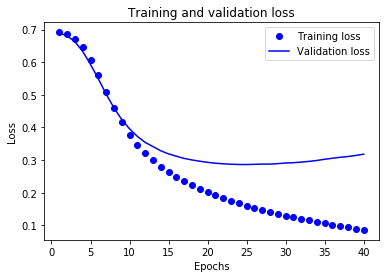

In [23]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

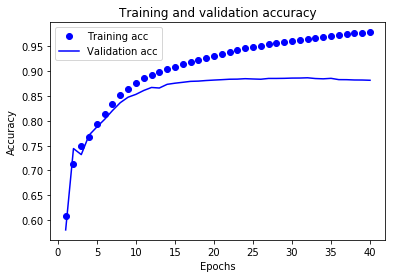

In [24]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Model saving and loading

In [0]:
from keras.models import load_model
model.save('imdb_movie_review_sentiment.h5')

# 특정 레이어의 weights를 얻어내서 저장하고 싶다면
# layer.get_weights()를 호출하고 그 결과를 numpy.save로 저장

# 저장된 weights를 읽어다가 (numpy.load) 다시 로드하고 싶다면
# layer.set_weights(weights)를 사용. Refer to https://stackoverflow.com/questions/44644800/is-it-possible-to-save-a-trained-layer-to-use-layer-on-keras

# model을 일단 날리고 다시 로드
del model  
model = load_model('imdb_movie_review_sentiment.h5')

Try some random review text

In [26]:
# print two and compare test_data, test_labels
print(test_data[0])
print(test_labels[0])

[   1  591  202   14   31    6  717   10   10    2    2    5    4  360
    7    4  177 5760  394  354    4  123    9 1035 1035 1035   10   10
   13   92  124   89  488 7944  100   28 1668   14   31   23   27 7479
   29  220  468    8  124   14  286  170    8  157   46    5   27  239
   16  179    2   38   32   25 7944  451  202   14    6  717    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [27]:
test_data[0].shape

(256,)

In [28]:
def encode_review(review_text):
    word_index = imdb.get_word_index()
    words = review_text.split(" ")
    
    return [word_index.get(word, 2) for word in words]
  
test_review_text = "the movie had so much hype but it didn't meet my expectation"
test_review_vec = encode_review(test_review_text)
print(test_review_vec)

[1, 17, 66, 35, 73, 3398, 18, 9, 158, 906, 58, 6612]


In [29]:
test_review_vec_padded = keras.preprocessing.sequence.pad_sequences([test_review_vec],
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)
model.predict(test_review_vec_padded)

array([[0.80032516]], dtype=float32)

In [30]:
model.predict_classes(test_review_vec_padded)

array([[1]], dtype=int32)